# PRODUCT CLUSTER ANALYSIS

## Objective

As part of a continuous effort to enhance operational efficiency and gain deeper market insights, this project is aimed at conducting product clustering analysis using historical sales data. The primary objective is to group similar products based on sales patterns, thereby discerning trends, optimizing inventory management processes, and tailoring our offerings to better align with customer preferences.

## Data Dictionary

dataset used for model building contained 307645 observations of 9 variables. The data contains the following information:

| Variable| Description|
| ---|----|
| YEAR| Calendar Year|
| MONTH| Month|
|SUPPLIER|Supplier Name|
|ITEM CODE|Item code|
|ITEM DESCRIPTION|Item Description|
|ITEM TYPE|Item Type|
|RETAIL SALES|Cases of product sold from DLC dispensaries|
|RETAIL TRANSFERS|Cases of product transferred to DLC dispensaries|
|WAREHOUSE SALES|Cases of product sold to MC licensees|

## Step 1: Import Libraries

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as ticker
import locale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples

## Step 2: Load Dataset

In [334]:
# load dataset
df=pd.read_csv('C:/Users/LENOVO/project c 1/Warehouse_and_Retail_Sales.csv')

## Step 3: Data Preprocessing

In [337]:
# Display the first five rows of a DataFrame
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [339]:
# checking the details of Dataframe Columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [341]:
# checking the shape of the Data
df.shape

(307645, 9)

In [343]:
# The number of unique values in specification
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

In [345]:
# Checking the decriptive statistics of Dataset
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [347]:
# Checking the Missing values in the dataset
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

From these we can find that there are 167 missing values in the column of SUPPLIER, 1 value missing in ITEM TYPE column and 3 values missing inthe column of RETAIL SALES

In [350]:
# DataFrame Null Values as Percentages
null_percentage = df.isnull().mean() * 100
print(null_percentage)

YEAR                0.000000
MONTH               0.000000
SUPPLIER            0.054283
ITEM CODE           0.000000
ITEM DESCRIPTION    0.000000
ITEM TYPE           0.000325
RETAIL SALES        0.000975
RETAIL TRANSFERS    0.000000
WAREHOUSE SALES     0.000000
dtype: float64


We can remove the null values since they are not significantly present in the dataset.

## Data Cleaning

In [354]:
# Dropping all the null values present in dataset
Df=df.dropna()
Df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [356]:
# Number of Duplicated Rows in the Datase
num_duplicated = Df.duplicated().sum()
print(f"Number of Duplicated Rows: {num_duplicated}")

Number of Duplicated Rows: 0


In [358]:
num_rows, num_columns = Df.shape
print(f"Shape of Cleaned DataFrame: {num_rows} rows and {num_columns} columns")

Shape of Cleaned DataFrame: 307477 rows and 9 columns


After removing null values and duplicate entries, the dataset now contains 307,477 rows, reduced from the original 307,645 rows.

In [361]:
Df.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


In [363]:
# Count of Each Unique Value in index column
Df["ITEM TYPE"].value_counts()

ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

In [365]:
# Count of Unique Item Descriptions:
Df["ITEM DESCRIPTION"].nunique()

34805

In [367]:
#  Count of Suppliers:
Df['SUPPLIER'].nunique()

396

## Step4: Exploratory Data Analysis (EDA)

SCALING THE FEATURES

In [371]:
# Grouping data to get sales patterns for each product
product_sales = Df.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()

In [373]:
numeric_features = Df[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']]

In [375]:
# Select numeric features for clustering
numerical_features = product_sales[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']]

In [377]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()

In [379]:
product_sales_scaled = scaler.fit_transform(numeric_features)

In [381]:
product_sales_scaled

array([[0.0035601 , 0.01896694, 0.21438682],
       [0.0035601 , 0.01945972, 0.21447261],
       [0.0035601 , 0.01896694, 0.21434393],
       ...,
       [0.00783333, 0.01896694, 0.21447261],
       [0.0035601 , 0.01896694, 0.21438682],
       [0.0035601 , 0.01896694, 0.21434393]])

In [383]:
# creating a new DataFrame (scaled_df)
scaled_df = pd.DataFrame(product_sales_scaled, columns=numeric_features.columns, index=Df.index)

In [385]:
scaled_df.head()

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,0.00356,0.018967,0.214387
1,0.00356,0.019460,0.214473
2,0.00356,0.018967,0.214344
3,0.00356,0.018967,0.214344
4,0.00401,0.018967,0.214301


HISTOGRAM

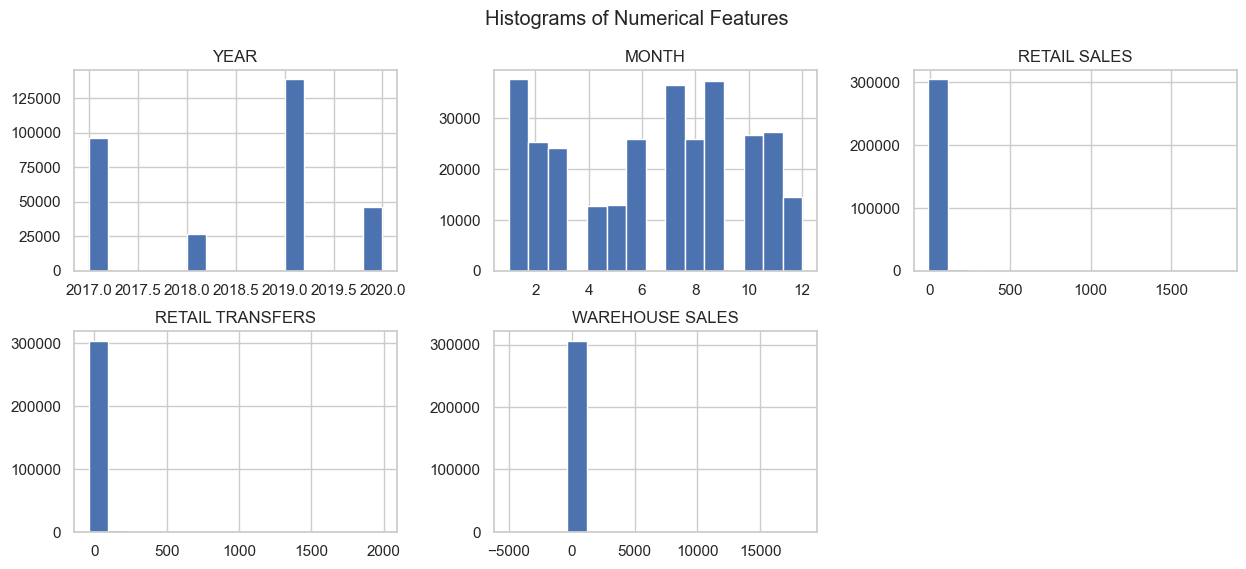

In [388]:
# Plot histograms for numerical features
numeric_features = Df.select_dtypes(include=['int64','float64']).columns
Df[numeric_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

ITEM TYPE SALES

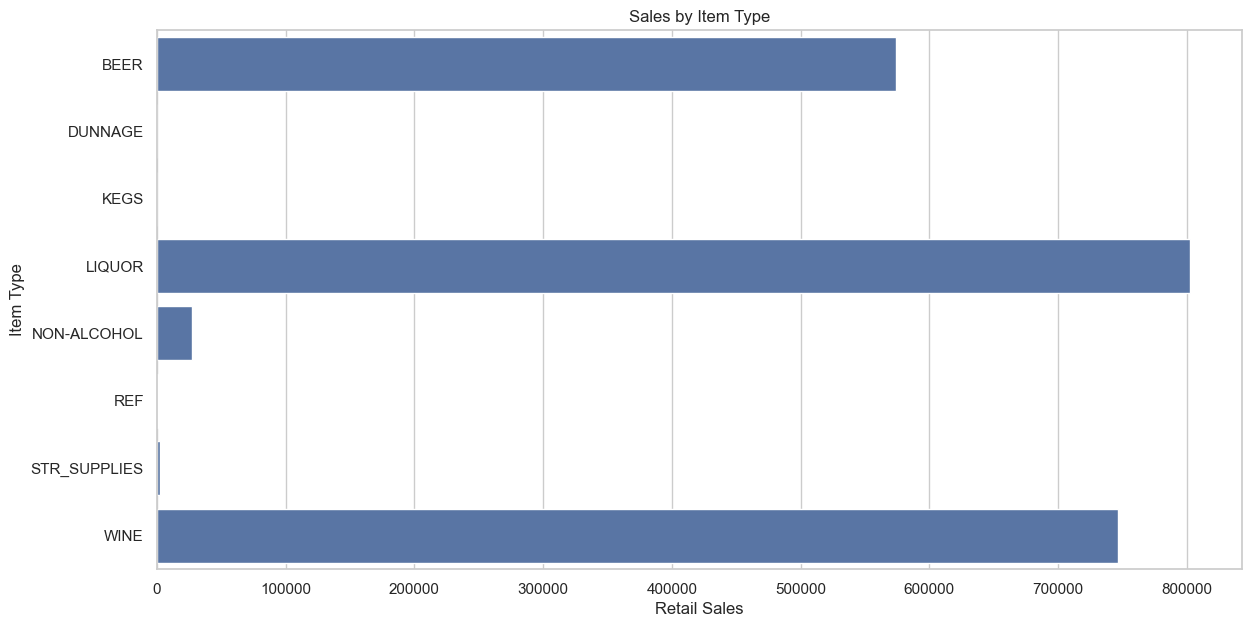

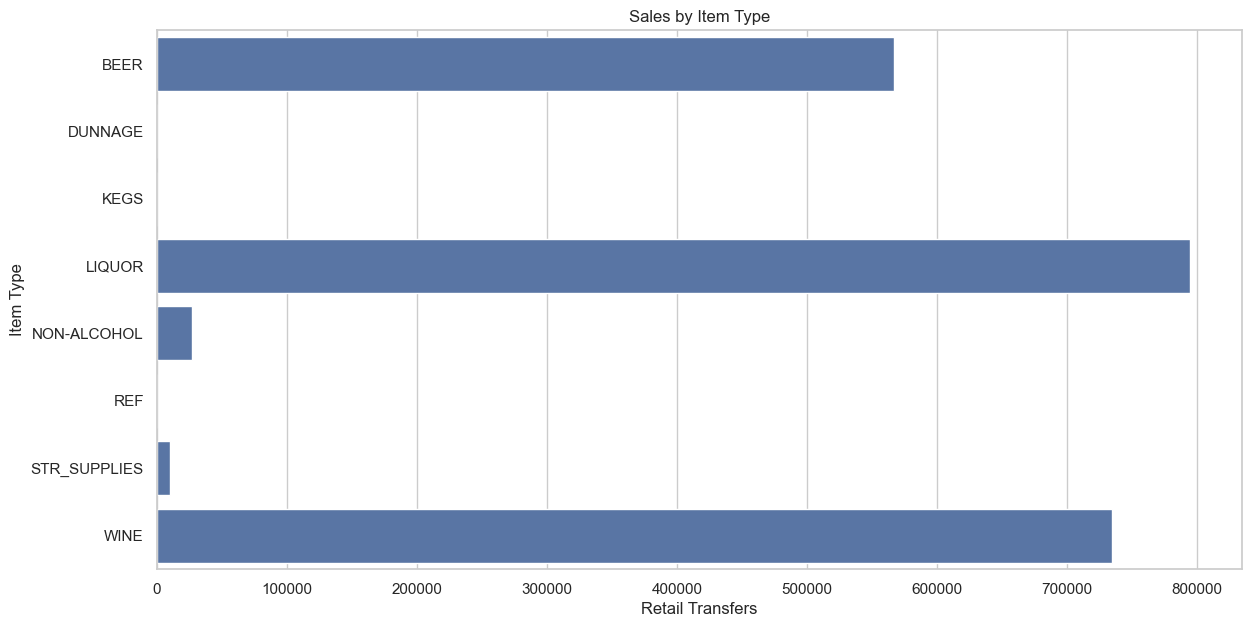

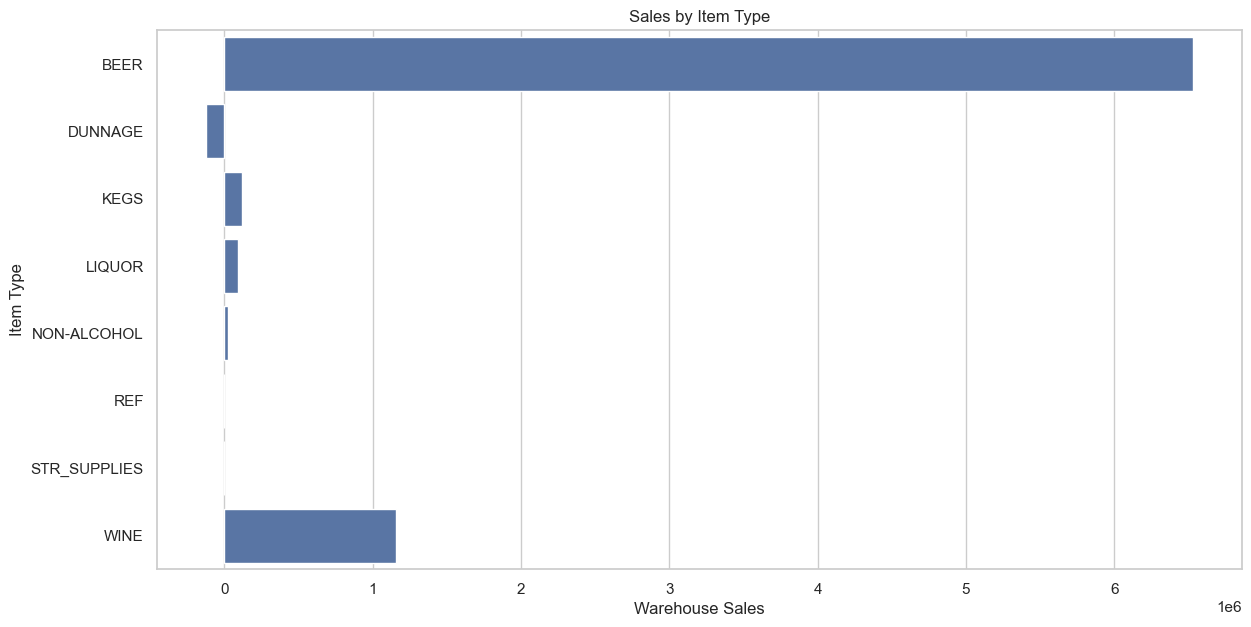

In [391]:
item_type_sales = Df.groupby('ITEM TYPE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL SALES', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Retail Sales')
plt.ylabel('Item Type')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL TRANSFERS', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Retail Transfers')
plt.ylabel('Item Type')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='WAREHOUSE SALES', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Warehouse Sales')
plt.ylabel('Item Type')
plt.show()

From the first graph item type vs retail sale we can find the liquor is the most saled item follwed by wine and beer. second graph item type vs retail trasfer is almost same as the 1st.then from the last graph item type vs warehouse sale beer is the most saled item.

In [394]:
# Top 5 beverage suppliers
supp_groupby = Df.groupby('SUPPLIER').size().nlargest()
supp_groupby

SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       20994
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
dtype: int64

In [396]:
# Ranking of top suppliers by beverage category

list_item = ['WINE', 'LIQUOR', 'BEER', 'KEGS', 'NON-ALCOHOL']

for i in list_item:
    best_supplier = Df[Df['ITEM TYPE'] == i]['SUPPLIER'].value_counts()[0:1]
    print(f"Top supplier of {i} {best_supplier}\n")

Top supplier of WINE SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO    16864
Name: count, dtype: int64

Top supplier of LIQUOR SUPPLIER
DIAGEO NORTH AMERICA INC    6358
Name: count, dtype: int64

Top supplier of BEER SUPPLIER
LEGENDS LTD    10479
Name: count, dtype: int64

Top supplier of KEGS SUPPLIER
LEGENDS LTD    2549
Name: count, dtype: int64

Top supplier of NON-ALCOHOL SUPPLIER
AMERICAN BEVERAGE MARKETERS    416
Name: count, dtype: int64



SUPPLIER SALES

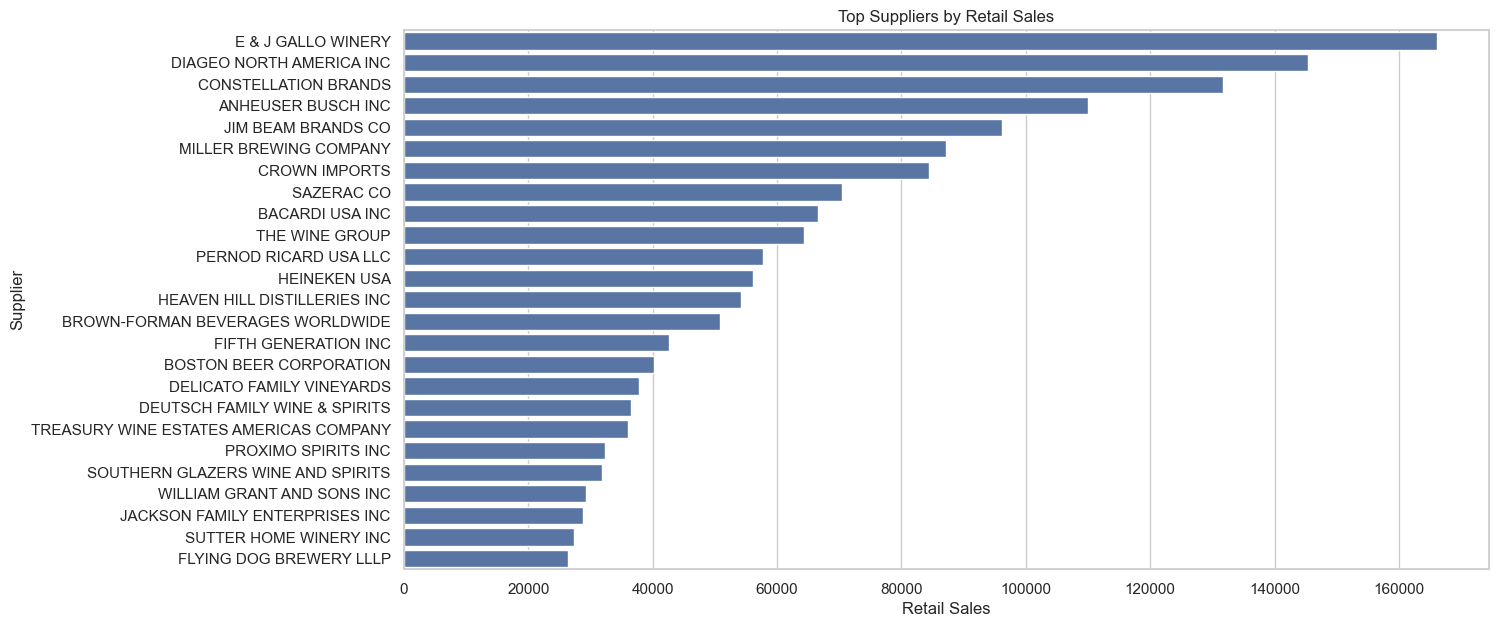

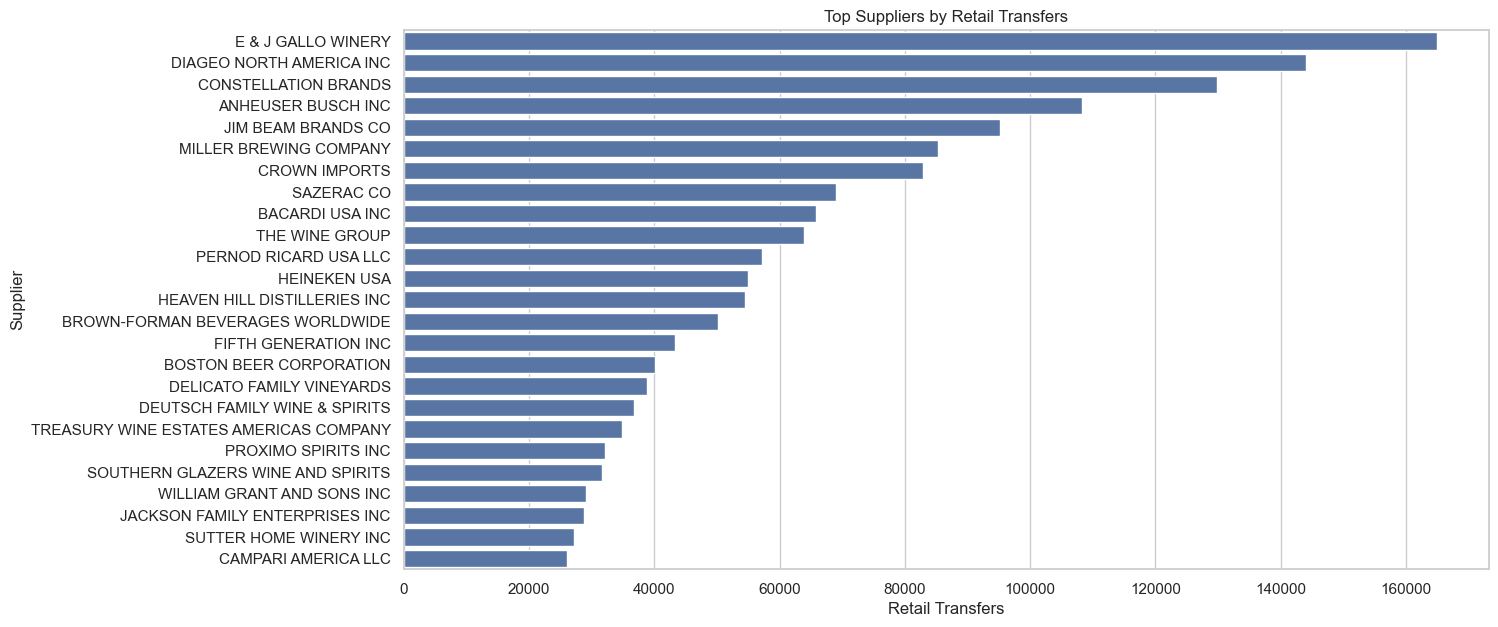

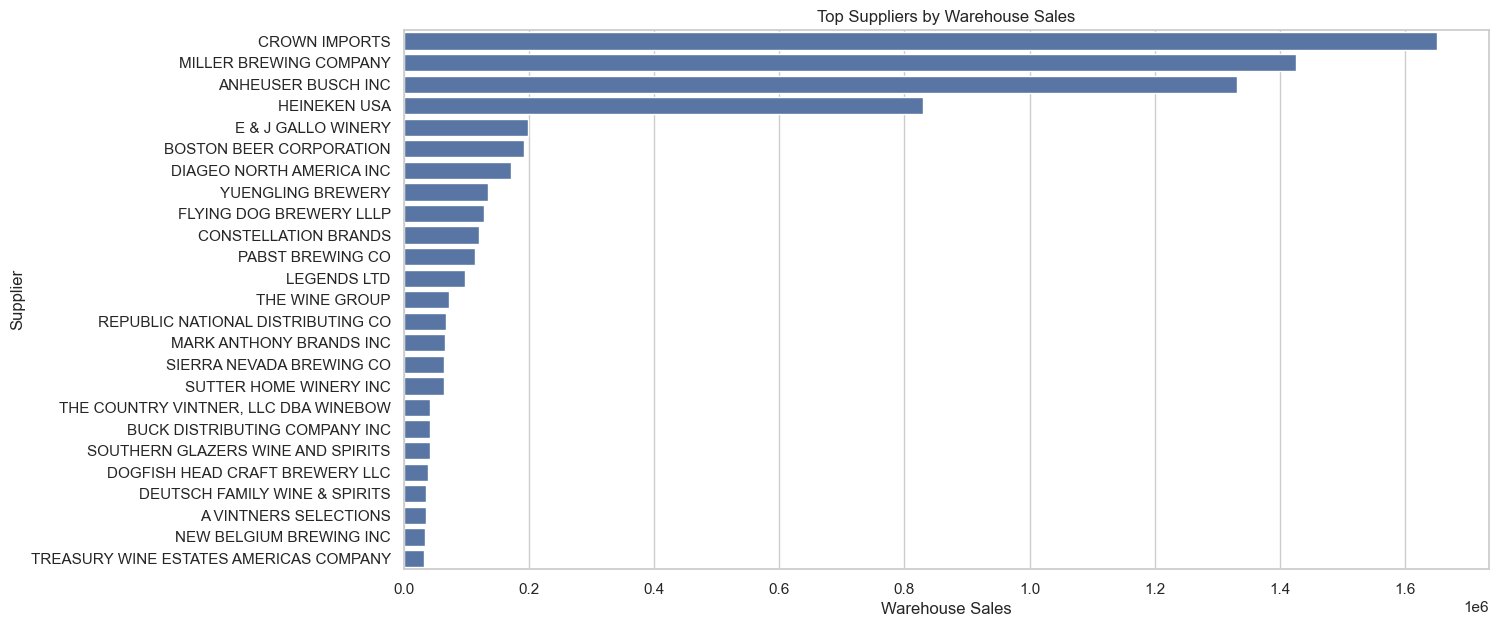

In [399]:
supplier_sales = Df.groupby('SUPPLIER')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].sum().reset_index()
top_suppliers = supplier_sales.nlargest(25, 'RETAIL SALES')


plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL SALES', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Supplier')
plt.show()

top_suppliers = supplier_sales.nlargest(25, 'RETAIL TRANSFERS')

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL TRANSFERS', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Retail Transfers')
plt.xlabel('Retail Transfers')
plt.ylabel('Supplier')
plt.show()

top_suppliers = supplier_sales.nlargest(25, 'WAREHOUSE SALES')

plt.figure(figsize=(14, 7))
sns.barplot(x='WAREHOUSE SALES', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Supplier')
plt.show()

MONTHLY SALES

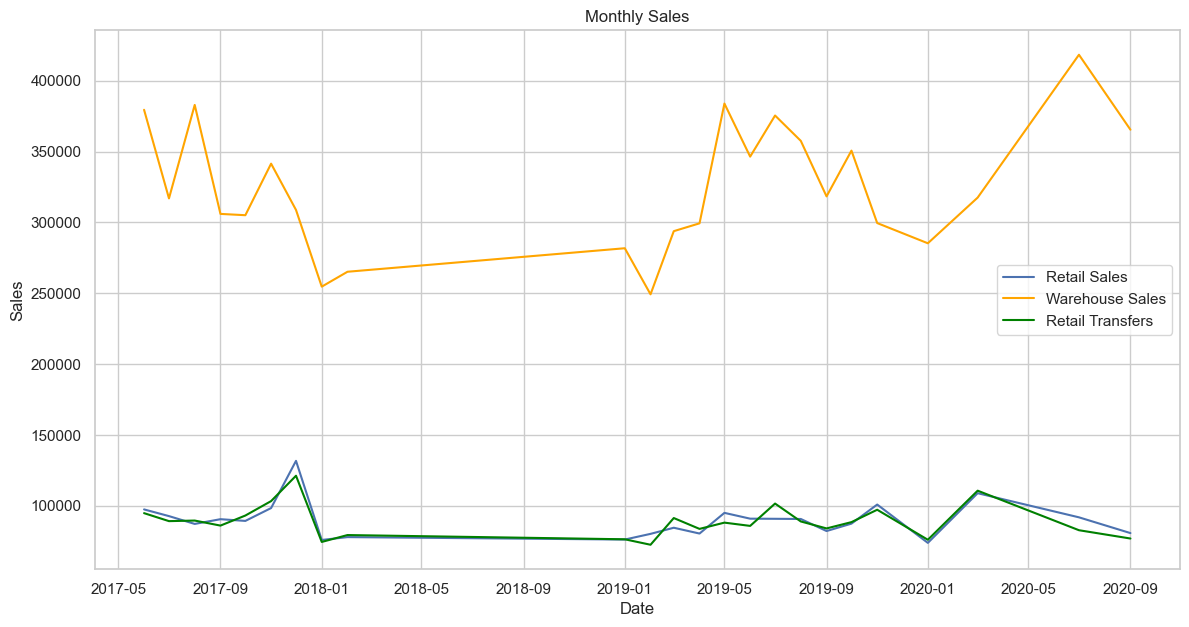

In [401]:
monthly_sales = Df.groupby(['YEAR', 'MONTH'])[['RETAIL SALES','RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['DATE'], monthly_sales['RETAIL SALES'], label='Retail Sales')
plt.plot(monthly_sales['DATE'], monthly_sales['WAREHOUSE SALES'], label='Warehouse Sales', color='orange')
plt.plot(monthly_sales['DATE'], monthly_sales['RETAIL TRANSFERS'], label='Retail Transfers', color='green')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

From the above graph we can find that when we consider the monthly sales warehouse sales(least value 2.5L in 2019-02,highest value 5L in 2020-07) mostly occured compare with retail transfer(least value 50K in 2020-01 and also in 2018-01,highest value 1.3L in2017-11 ) and retail sales(50K-1.4L)

CORRELATION METRIX OF RETAIL SALES AND WAREHOUSE SALES

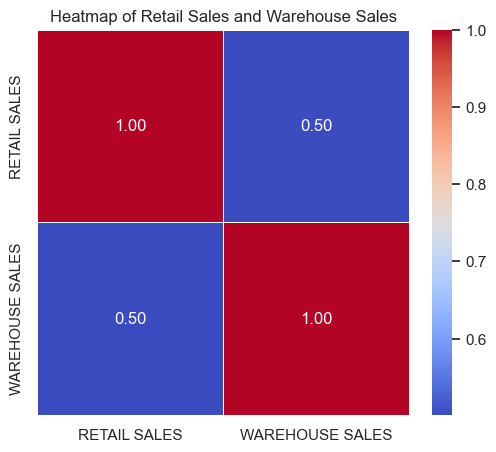

In [406]:
# Ensure relevant columns are numeric
Df['RETAIL SALES'] = pd.to_numeric(Df['RETAIL SALES'], errors='coerce')
Df['WAREHOUSE SALES'] = pd.to_numeric(Df['WAREHOUSE SALES'], errors='coerce')

# Filter only 'retail_sales' and 'warehouse_sales'
filtered_df = Df[['RETAIL SALES', 'WAREHOUSE SALES']]

# Calculate the correlation matrix for the selected features
correlation_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Heatmap of Retail Sales and Warehouse Sales")
plt.show()

The correlation coefficient between Retail sales and warehouse sales is approximately 0.501.This indicates a moderate positive correlation between these two varables but the relationship is not extremly strong.

In [225]:
Df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [227]:
# Removing columns that do not contribute to model buildin
Df = Df.drop(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION'], axis=1)

In [229]:
Df = pd.get_dummies(Df, columns=['ITEM TYPE'], dtype=int)

In [231]:
drop_df = Df.drop(['RETAIL SALES','RETAIL TRANSFERS', 'WAREHOUSE SALES'], axis=1)

# concat with scaled data
new_df = pd.concat([drop_df, scaled_df], axis=1)
new_df.head(2)

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,0,0,0,0,0,0,0,1,0.00356,0.018967,0.214387
1,0,0,0,0,0,0,0,1,0.00356,0.019460,0.214473


In [233]:
new_df.isnull().sum()

ITEM TYPE_BEER            0
ITEM TYPE_DUNNAGE         0
ITEM TYPE_KEGS            0
ITEM TYPE_LIQUOR          0
ITEM TYPE_NON-ALCOHOL     0
ITEM TYPE_REF             0
ITEM TYPE_STR_SUPPLIES    0
ITEM TYPE_WINE            0
RETAIL SALES              0
RETAIL TRANSFERS          0
WAREHOUSE SALES           0
dtype: int64

HYPER PARAMETER TUNING

Finding k value using Elbow Method

In [237]:
## Manual Process
## Elbow Method to select the K values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

In [239]:
wcss

[173257.19243116758,
 68963.61268136314,
 20420.52555514869,
 4175.153369890537,
 981.7765534568333,
 469.47049970762487,
 322.90348341232294,
 183.78791156603407,
 125.32828767754415,
 98.8230777093855]

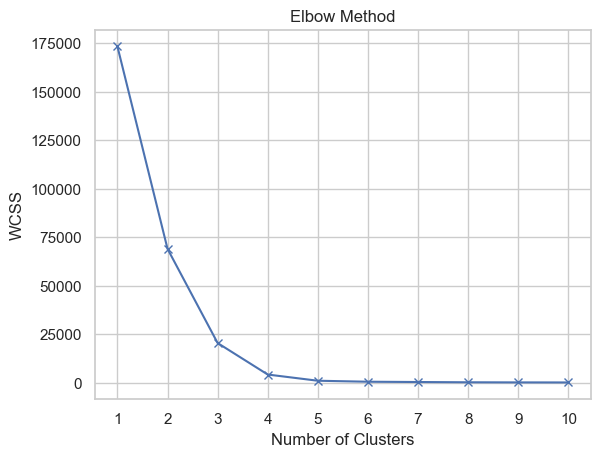

In [241]:
# Elbow Curve Plot for Cluster Validation

plt.plot(range(1, 11), wcss, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The elbow curve analysis indicates that the optimal number of clusters for the dataset occurs where the curve bends sharply. In our case, this bend is observed at the 4th cluster.K=4

## MODEL BUILDING USING K MEANS

In [245]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster = kmeans.fit_predict(new_df)
clusters = pd.Series(cluster, name='clusters')
clusters.value_counts()

clusters
1    187640
0     64910
2     44781
3     10146
Name: count, dtype: int64

In [247]:
cluster_df = pd.concat([new_df, clusters], axis=1)

In [411]:
cluster_df.isnull().sum()

ITEM TYPE_BEER            0
ITEM TYPE_DUNNAGE         0
ITEM TYPE_KEGS            0
ITEM TYPE_LIQUOR          0
ITEM TYPE_NON-ALCOHOL     0
ITEM TYPE_REF             0
ITEM TYPE_STR_SUPPLIES    0
ITEM TYPE_WINE            0
RETAIL SALES              0
RETAIL TRANSFERS          0
WAREHOUSE SALES           0
clusters                  0
mini_batch_cluster        0
dtype: int64

In [409]:
for column in cluster_df.columns:
    cluster_df[column] = cluster_df[column].fillna(cluster_df[column].mode()[0])

In [253]:
cluster_df["clusters"] = cluster_df["clusters"].astype(int)

In [255]:
cluster_df.head(3)

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00356,0.018967,0.214387,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00356,0.019460,0.214473,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214344,2


### Visualizing the clustered dataframe

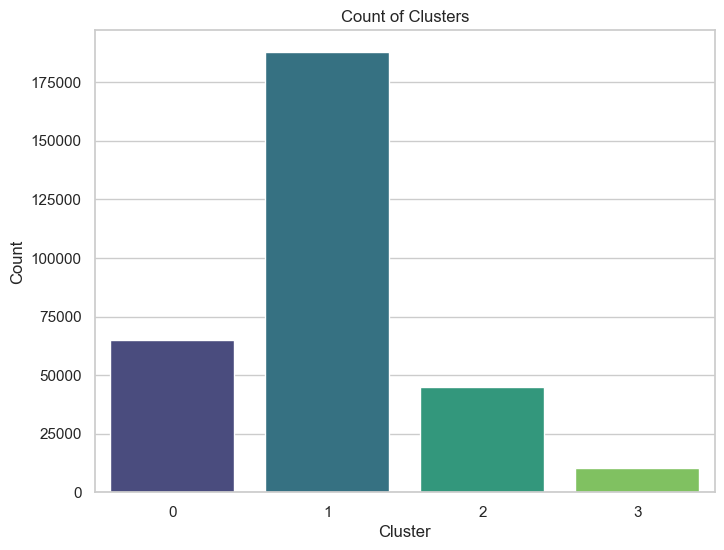

In [258]:
# Calculate value counts of clusters
cluster_counts = cluster_df['clusters'].value_counts().reset_index()
cluster_counts.columns = ['clusters', 'counts']

# Plotting the countplot
plt.figure(figsize=(8, 6))
sns.barplot(x='clusters', y='counts', data=cluster_counts, palette='viridis')
plt.title('Count of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [260]:
# Cluster Column Value Distribution
cluster_df['clusters'].value_counts()

clusters
1    187806
0     64910
2     44781
3     10146
Name: count, dtype: int64

In [262]:
# DataFrame Initialization: Cluster Field with Value 0
cluster_1_df = cluster_df[cluster_df['clusters']==0]
cluster_1_df.head()

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,clusters
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007076,0.020938,0.214301,0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004493,0.019460,0.214301,0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004120,0.018967,0.214301,0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003933,0.018967,0.214301,0
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003747,0.018967,0.214301,0


In [264]:
#DataFrame Initialization: Cluster Field with Value 1
cluster_2_df = cluster_df[cluster_df['clusters']==1]
cluster_2_df.head()

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.018967,0.214387,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.019460,0.214473,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.018967,0.214344,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.004010,0.018967,0.214301,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005074,0.018967,0.214558,1


In [266]:
# DataFrame Initialization: Cluster Field with Value 2
cluster_3_df = cluster_df[cluster_df['clusters']==2]
cluster_3_df.head()

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,clusters
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214344,2
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214387,2
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003615,0.018967,0.214301,2
33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214687,2
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004657,0.019952,0.214301,2


In [268]:
# DataFrame Initialization: Cluster Field with Value 3
cluster_4_df = cluster_df[cluster_df['clusters']==3]
cluster_4_df.head()

,ITEM TYPE_BEER,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,clusters
46,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214344,3
83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214344,3
89,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214387,3
119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214473,3
144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.215459,3


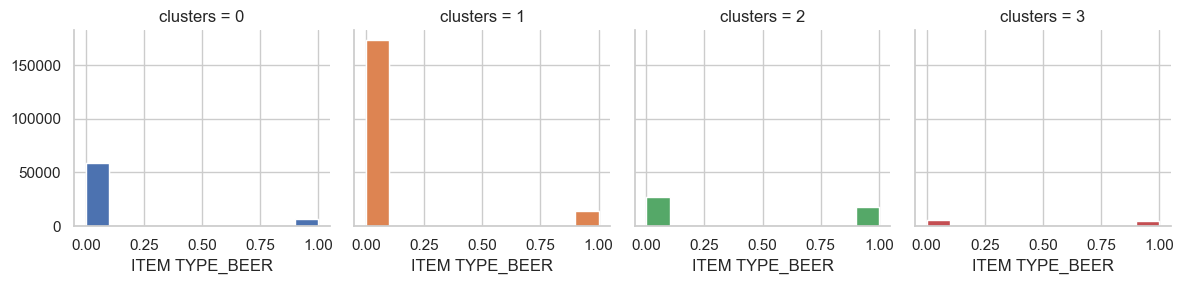

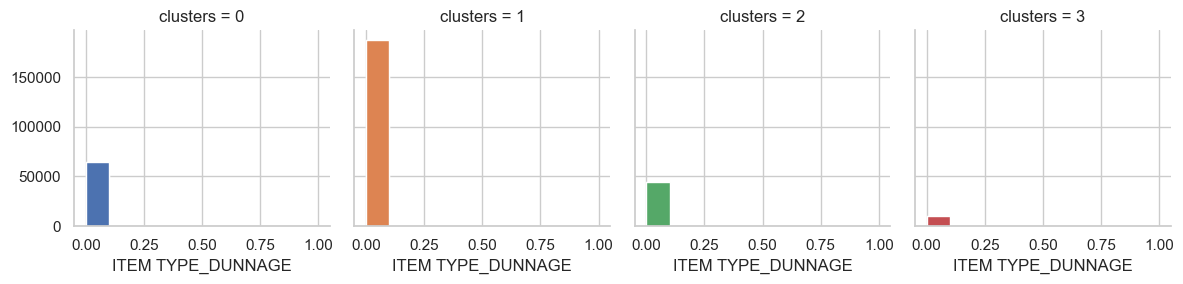

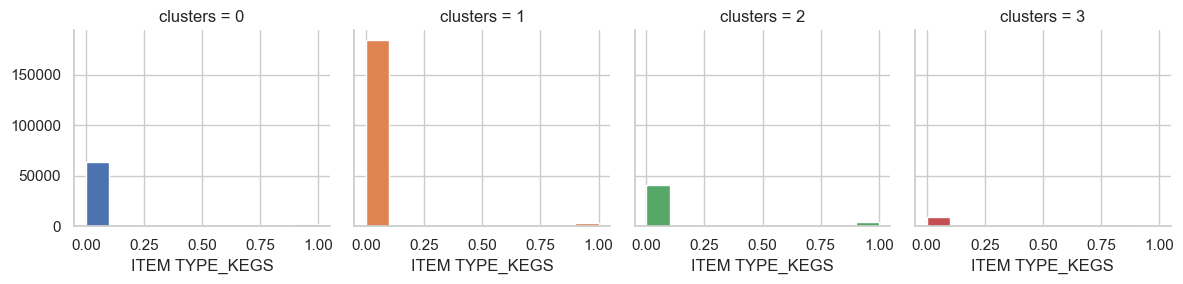

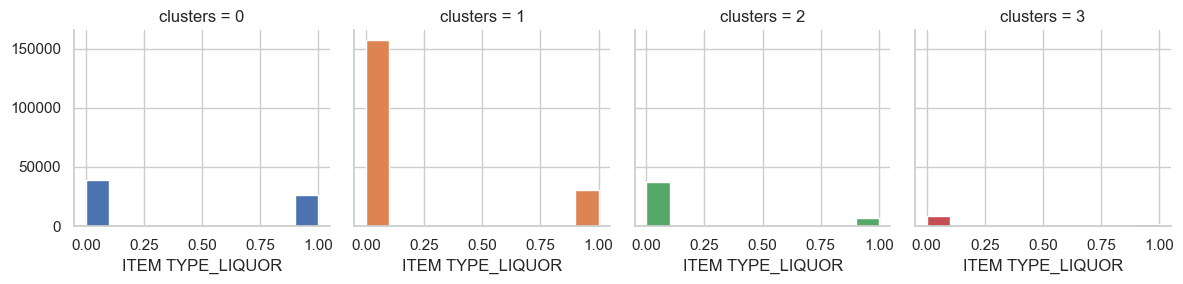

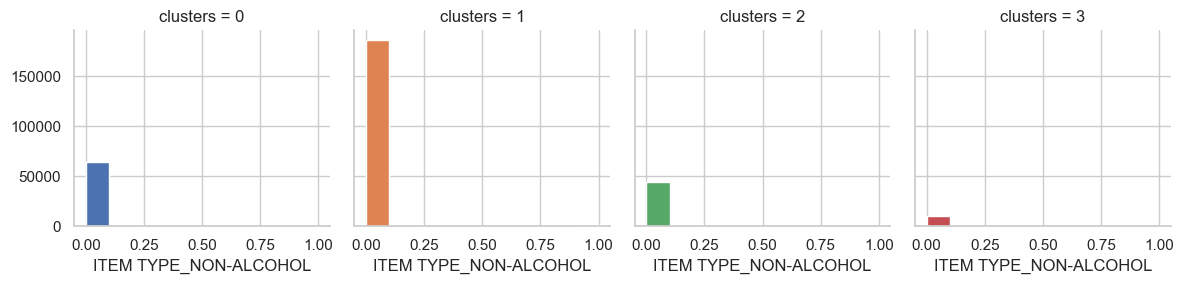

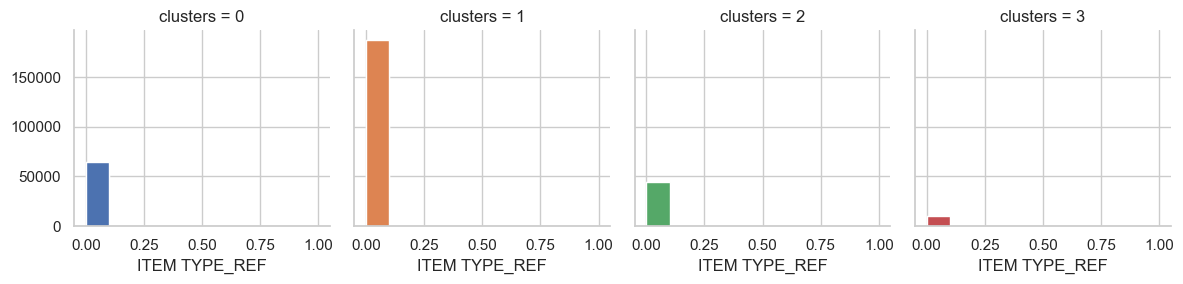

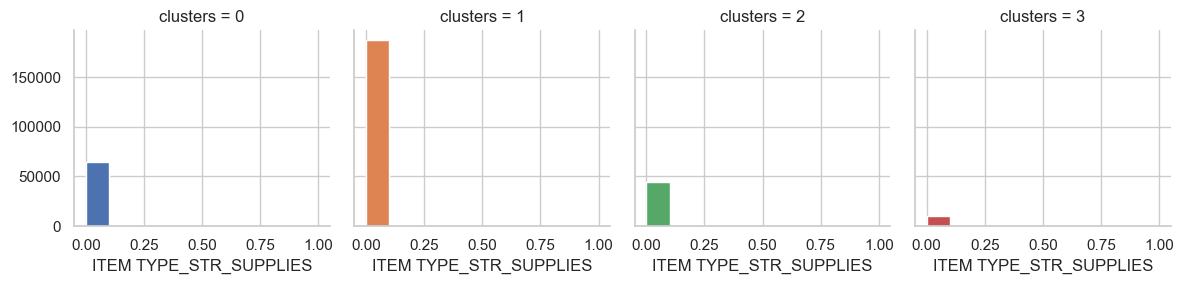

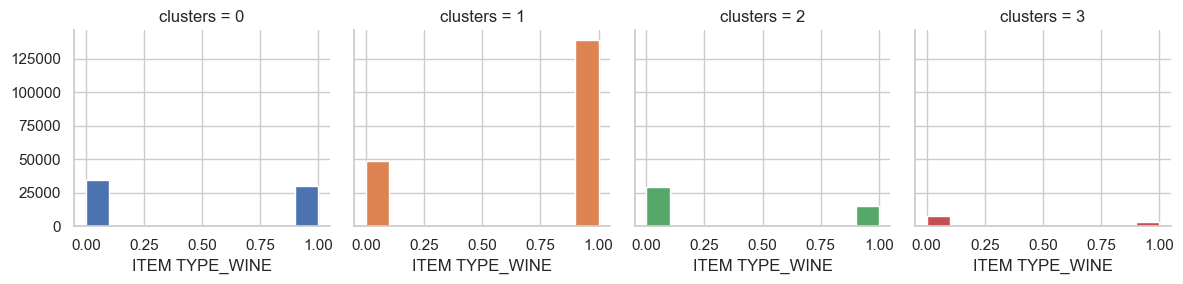

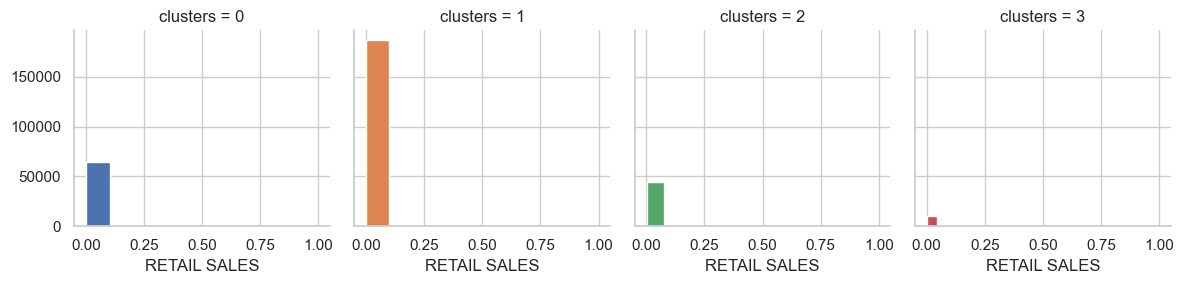

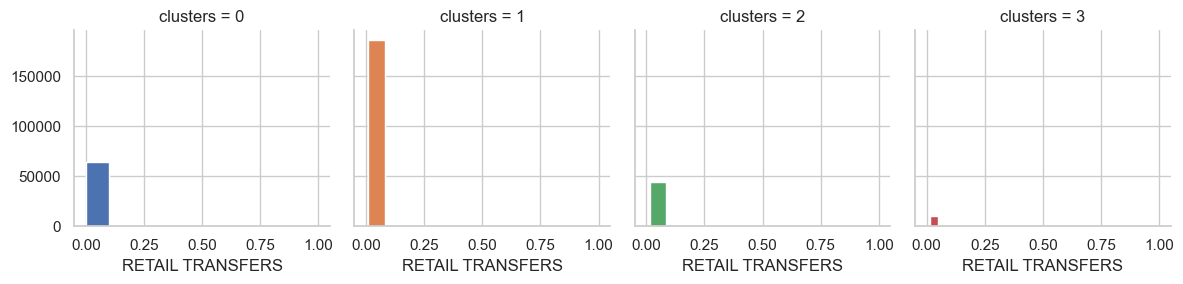

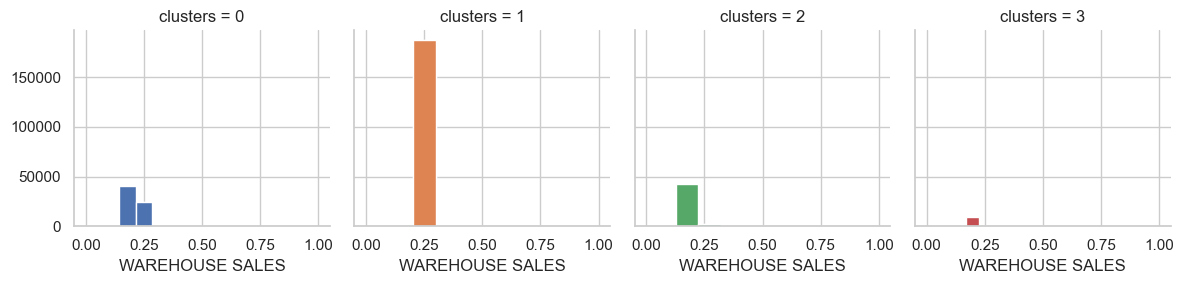

In [270]:
# Multi-plot Visualization Using FacetGrid

for c in cluster_df.drop(columns=['clusters']):
  grid = sns.FacetGrid(cluster_df, col='clusters', hue='clusters', palette='deep')
  grid.map(plt.hist, c)
  grid = grid.map(plt.hist, c)
plt.show()

### Silhouette Scores
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [122]:
silhouette_scores = []

for k in range(4,9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

For n_clusters = 4, the average silhouette_score is 0.9801336399203023
For n_clusters = 5, the average silhouette_score is 0.9904699802397312
For n_clusters = 6, the average silhouette_score is 0.9921129821968466
For n_clusters = 7, the average silhouette_score is 0.992534216130773
For n_clusters = 8, the average silhouette_score is 0.993023889583482


In [124]:
silhouette_scores

[0.9801336399203023,
 0.9904699802397312,
 0.9921129821968466,
 0.992534216130773,
 0.993023889583482]

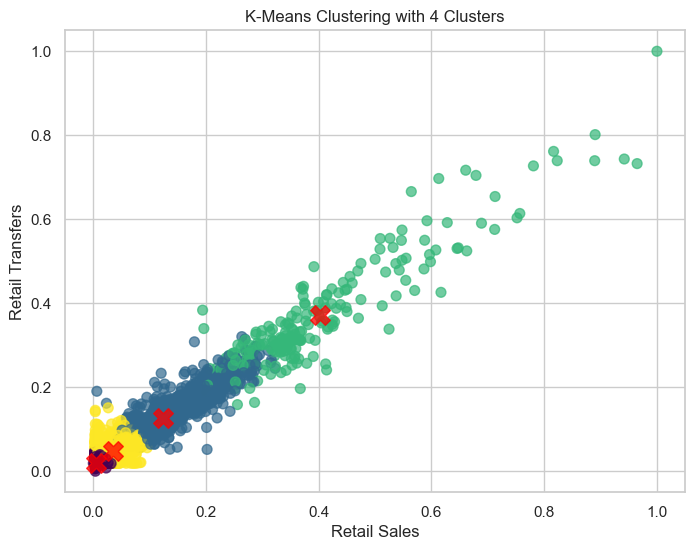

In [274]:
# Visualize clustering results
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(product_sales_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(product_sales_scaled[:, 0], product_sales_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')
plt.show()

The clusters appear linear but overlap, prompting evaluation using the silhouette coefficient to assess and refine their distinctiveness and separation.

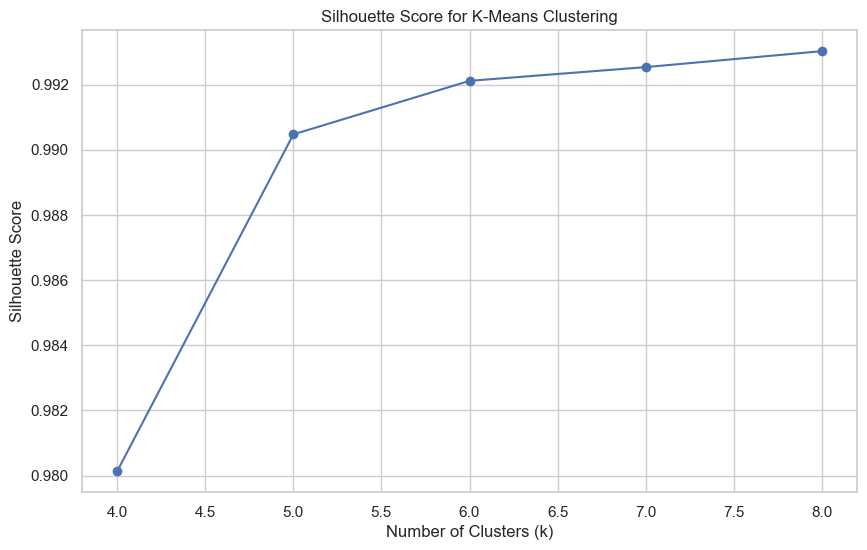

In [277]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 9), silhouette_scores, marker='o') # Use range(4,9) to match the number of clusters used
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.grid(True)
plt.show()

- In this specific plot, the silhouette score increases as the number of clusters increases from 4 to 8. This means that the data points might be better represented by a higher number of clusters in this range.
-  For instance, if the data naturally falls into 5 categories based on real-world factors, that would be a strong indicator for using 5 clusters.

In [281]:
### K-Means Total Data

In [283]:
# maximum from silhouette score
max_score = max(silhouette_scores)
print(f"Maximum Silhouette Score: {max_score}")

Maximum Silhouette Score: 0.993023889583482


In [285]:
new_df.columns

Index(['ITEM TYPE_BEER', 'ITEM TYPE_DUNNAGE', 'ITEM TYPE_KEGS',
       'ITEM TYPE_LIQUOR', 'ITEM TYPE_NON-ALCOHOL', 'ITEM TYPE_REF',
       'ITEM TYPE_STR_SUPPLIES', 'ITEM TYPE_WINE', 'RETAIL SALES',
       'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

#### Clustering of Warehouse Sales and Retail Sales

5 clusters

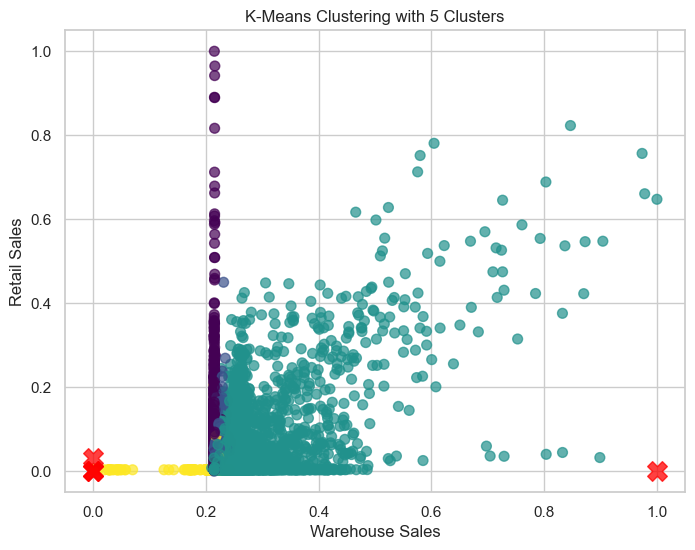

In [295]:
best_k = 5
range_n_clusters = list(range(2, 2 + len(silhouette_scores)))

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=0)
cluster_labels = kmeans.fit_predict(new_df)


# Plot clustersa
plt.figure(figsize=(8, 6))
plt.scatter(new_df['WAREHOUSE SALES'], new_df["RETAIL SALES"], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel('Warehouse Sales')
plt.ylabel('Retail Sales')
plt.show()


- Cluster 1 (Upper left): This cluster appears to group data points with relatively high values on both dimensions visualized in the plot.
- Cluster 2 (Upper right): This cluster likely consists of data points with high values on the first dimension (X-axis) and lower values on the second dimension (Y-axis).
- Cluster 3 (Center): This cluster may contain data points with mid-range values on both dimensions.
- Cluster 4 (Lower left): This cluster appears to group data points with relatively low values on the first dimension and higher values on the second dimension.
- Cluster 5 (Lower right): This cluster likely consists of data points with low values on both dimensions visualized in the plot.

## Clustering Evaluation Matix

In [299]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [301]:
X = cluster_df.drop(columns=['clusters'], axis=1)
y = cluster_df['clusters']

In [303]:
kmeans = KMeans(n_clusters=4).fit(X)
cluster_df['clusters'] = kmeans.labels_

# Calculate metrics
dbi = davies_bouldin_score(X, cluster_df['clusters'])
chi = calinski_harabasz_score(X, cluster_df['clusters'])

print(f'Davies-Bouldin Index: {dbi}')
print(f'Calinski-Harabasz Index: {chi}')

Davies-Bouldin Index: 0.10855049115306267
Calinski-Harabasz Index: 3668723.6799368635


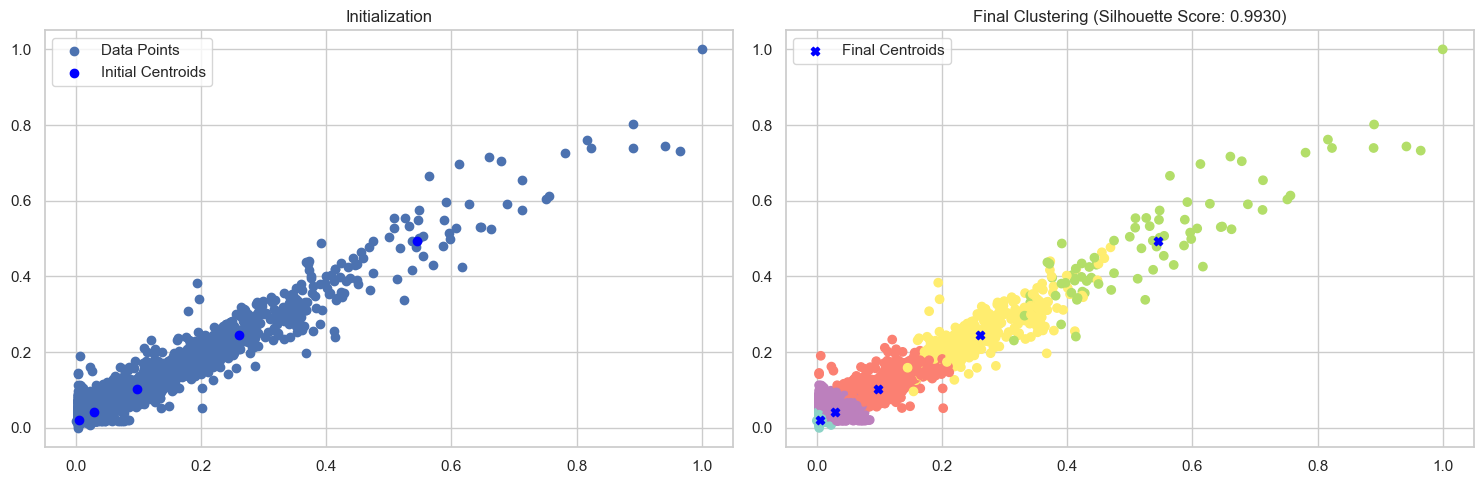

In [307]:
# Evaluation of K-means Clustering (5 Clusters) Using Silhouette Score

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(product_sales_scaled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

ax = axes[0]
ax.scatter(product_sales_scaled[:, 0],product_sales_scaled[:, 1], label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()

ax = axes[1]
# Assign cluster labels to each data point
cluster_labels = kmeans.predict(product_sales_scaled)
# Use cluster labels as color values
ax.scatter(product_sales_scaled[:, 0], product_sales_scaled[:, 1], c=cluster_labels, cmap='Set3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='X', label='Final Centroids')
ax.set_title(f'Final Clustering (Silhouette Score: {silhouette_avg:.4f})')
ax.legend()

plt.tight_layout()
plt.show()

- Since the silhouette score is very high (0.9930), we can conclude that the k-means algorithm has successfully grouped the data points into clusters that are well-separated. In other words, the points within a cluster are closer together than they are to points in other clusters.

#### Mini-Batch KMeans

In [311]:
from sklearn.cluster import MiniBatchKMeans

In [313]:
# Perform Mini-Batch K-means clustering
best_k = 5  # Use your optimal number of clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=0)
cluster_df['mini_batch_cluster'] = minibatch_kmeans.fit_predict(X)

In [315]:
cluster_df['mini_batch_cluster']

0         0
1         0
2         2
3         0
4         0
         ..
301170    0
303009    0
306784    0
307259    0
307304    0
Name: mini_batch_cluster, Length: 307643, dtype: int32

In [317]:
# Calculate silhouette score for mini batch cluster
silhouette_avg = silhouette_score(X, cluster_df['mini_batch_cluster'])
print(f'Mini-Batch Silhouette Score: {silhouette_avg}')

Mini-Batch Silhouette Score: 0.990040855072656


In [318]:
dbi = davies_bouldin_score(X, cluster_df['clusters'])
chi = calinski_harabasz_score(X, cluster_df['clusters'])

print(f'Davies-Bouldin Index for mini bath cluster: {dbi}')
print(f'Calinski-Harabasz Index for mini bath cluster: {chi}')

Davies-Bouldin Index for mini bath cluster: 0.10855049115306267
Calinski-Harabasz Index for mini bath cluster: 3668723.6799368635


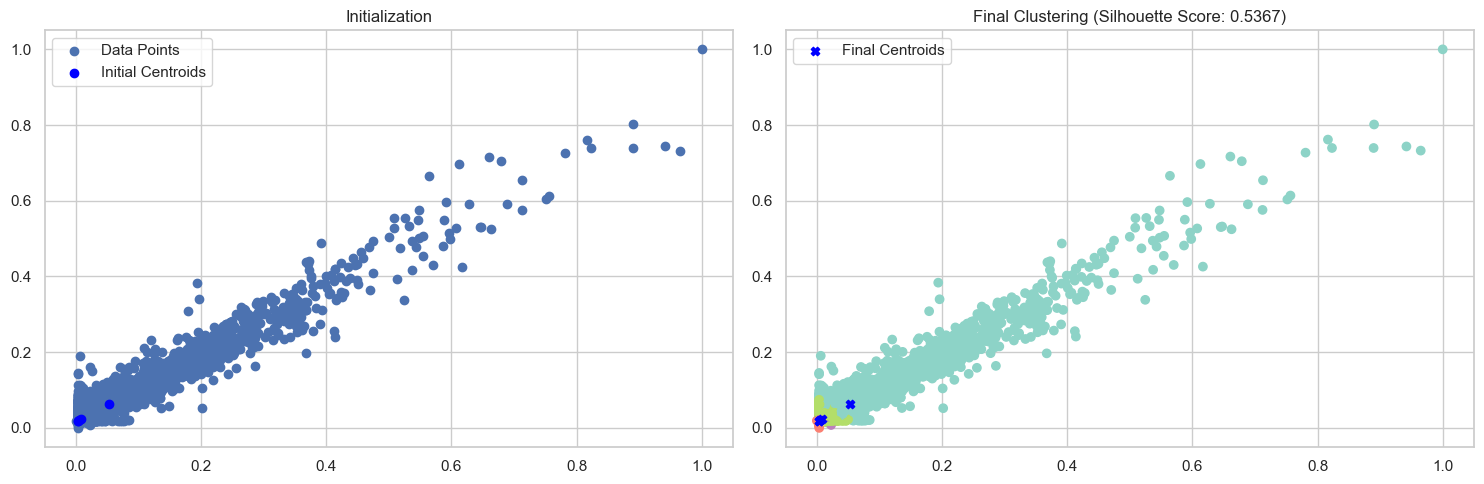

In [323]:
num_clusters = 5
batch_size = 100

# Initialize MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, random_state=42)
mini_batch_kmeans.fit(product_sales_scaled)

# Calculate silhouette score
cluster_labels = mini_batch_kmeans.predict(product_sales_scaled)
silhouette_avg = silhouette_score(product_sales_scaled, cluster_labels)

# Plot initialization and final clustering
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

# Plot initialization
ax = axes[0]
ax.scatter(product_sales_scaled[:, 0], product_sales_scaled[:, 1], label='Data Points')
ax.scatter(mini_batch_kmeans.cluster_centers_[:, 0], mini_batch_kmeans.cluster_centers_[:, 1],
           c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()

# Plot final clustering
ax = axes[1]
ax.scatter(product_sales_scaled[:, 0], product_sales_scaled[:, 1], c=cluster_labels, cmap='Set3')
ax.scatter(mini_batch_kmeans.cluster_centers_[:, 0], mini_batch_kmeans.cluster_centers_[:, 1],
           c='blue', marker='X', label='Final Centroids')
ax.set_title(f'Final Clustering (Silhouette Score: {silhouette_avg:.4f})')
ax.legend()

plt.tight_layout()
plt.show()


- The silhouette score of 0.6786 is considered to be a good score, but it's not as high as the 0.993 score we discussed previously. This suggests that the k-means algorithm may have been somewhat successful in grouping the data points, but the separation between the clusters might not be idea

### Strategic Approach to Beverage Market Optimization

1. Data-Driven Decisions: Continuously analyze sales data and consumer trends to optimize stock levels and minimize stockouts/overstock.
2. Supplier Collaboration: Work closely with suppliers for flexible supply chains, ensure timely deliveries, and avoid overstocking.
3. Regular Inventory Audits: Conduct regular audits to identify slow-moving/obsolete inventory and take proactive measures to free up capital.
4.  Prioritize Beer & Wine: Focus on stocking and promoting high-demand beer and wine products across all channels.
5. Seasonal Adjustments: Adapt inventory levels based on seasonal trends (e.g., stock up on wine before holidays, offer more non-alcoholic beverages in warmer months).
6. Targeted Marketing & Promotions: Tailor marketing and promotions to specific customer segments based on their preferences and buying behaviors.
7. Efficient Keg Distribution: Optimize warehouse operations to streamline keg distribution for wholesale channels and ensure timely supply to commercial establishments.
8. Product Portfolio Diversification: Explore expanding or specializing product offerings within market clusters (e.g., introduce premium wine selections).



## CONCLUSION

### Recap of project objective:
Throughout this project, our primary objective was to leverage data analysis to optimize inventory management processes and tailor our product offerings to better align with customer preferences.
### Achievements:
➤ Identified high-demand product categories (beer and wine).

➤ Determined seasonal trends and their impact on sales.

➤ Developed actionable insights for inventory management and retail strategies.
